In [1]:
import requests
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

INTERIM_PATH="data/interim/ENIGH"

In [2]:
os.chdir('..')

In [3]:
df_2022=pd.read_csv(f"{INTERIM_PATH}/2022.csv")
df_2020=pd.read_csv(f"{INTERIM_PATH}/2020.csv")
df_2018=pd.read_csv(f"{INTERIM_PATH}/2018.csv")
df_2016=pd.read_csv(f"{INTERIM_PATH}/2016.csv")

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_17029/2970915959.py:1: DtypeWarning: Columns (11,12,13,14,15,16,17,18,27,31,32,33,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022=pd.read_csv(f"{INTERIM_PATH}/2022.csv")
/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_17029/2970915959.py:2: DtypeWarning: Columns (11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2020=pd.read_csv(f"{INTERIM_PATH}/2020.csv")


In [19]:
def in_sonora(df):
    in_sonora= (df['folioviv']>=2600000000)&(df['folioviv']<2700000000)
    return in_sonora

def is_literate(df):
    if isinstance(df['alfabetism'], (int, float, complex)):
        is_illiterate=df['alfabetism']==1
    else:
        is_illiterate=df['alfabetism']=='1'
    return is_illiterate

# Grades:
def last_grade(df,grade):

    last_grade_dictionary={
    'preschool':1,
    'informal nursery school':2,
    'public daycare':3,
    'other daycare':5,
    'first grade':6,
    'second grade':7,
    'technical career with second grade':8,
    'highschool':9,
    'technical career with highschool':10,
    'normal':11,
    'professional':12,
    'masters or phd':13
    }

    if isinstance(df['nivel'], (int, float, complex)):
        last_grade=df['nivel']==last_grade_dictionary[grade]
    else:
        last_grade=df['nivel']==f'{last_grade_dictionary[grade]}'
    return last_grade

def approved_grade(df,grade):
    approved_grade_dictionary={
    'none':0,
    'preschool':1,
    'first grade':2,
    'second grade':3,
    'highschool':4,
    'technical career':6,
    'professional':7,
    'masters':8,
    'phd':9
    }
        
    if isinstance(df['nivelaprob'], (int, float, complex)):
        approved_grade=df['nivelaprob']==approved_grade_dictionary[grade]
    else:
        approved_grade=df['nivelaprob']==f'{approved_grade_dictionary[grade]}'
    return approved_grade
    
def is_assisting_school(df):
    if isinstance(df['asis_esc'], (int, float, complex)):
        is_assisting_school=df['asis_esc']==1
    else:
        is_assisting_school=df['asis_esc']=='1'
    return is_assisting_school


In [5]:
print(f"Amount of data obtained in Sonora in the year of 2016: {len(df_2016[in_sonora(df_2016)])}")
print(f"Amount of data obtained in Sonora in the year of 2018: {len(df_2018[in_sonora(df_2018)])}")
print(f"Amount of data obtained in Sonora in the year of 2020: {len(df_2020[in_sonora(df_2020)])}")
print(f"Amount of data obtained in Sonora in the year of 2022: {len(df_2022[in_sonora(df_2022)])}")

Amount of data obtained in Sonora in the year of 2016: 184
Amount of data obtained in Sonora in the year of 2018: 79
Amount of data obtained in Sonora in the year of 2020: 155
Amount of data obtained in Sonora in the year of 2022: 12332


In [29]:
print(f"Amount of data obtained in Mexico in the year of 2016: {len(df_2016)}")
print(f"Amount of data obtained in Mexico in the year of 2018: {len(df_2018)}")
print(f"Amount of data obtained in Mexico in the year of 2020: {len(df_2020)}")
print(f"Amount of data obtained in Mexico in the year of 2022: {len(df_2022)}")

Amount of data obtained in Mexico in the year of 2016: 3560
Amount of data obtained in Mexico in the year of 2018: 4043
Amount of data obtained in Mexico in the year of 2020: 6836
Amount of data obtained in Mexico in the year of 2022: 397182


# Graphs

In [13]:
df_2022[ 
    ['folioviv','numren','edad','nivel','nivelaprob','alfabetism','grado','gradoaprob','ing_tri']
]

,folioviv,numren,edad,nivel,nivelaprob,alfabetism,grado,gradoaprob,ing_tri
0,100005002,1,91,,2,1,,4,7434.78
1,100005002,2,48,,4,1,,3,33749.99
2,100005002,2,48,,4,1,,3,1956.52
3,100005002,3,13,07,3,1,2,1,391.30
4,100005002,3,13,07,3,1,2,1,978.26
...,...,...,...,...,...,...,...,...,...
397177,3260797908,2,50,,2,1,,6,2543.47
397178,3260797909,1,37,,2,1,,6,26413.04
397179,3260797910,1,63,,3,1,,3,136709.99
397180,3260797912,1,29,,7,1,,5,24358.69


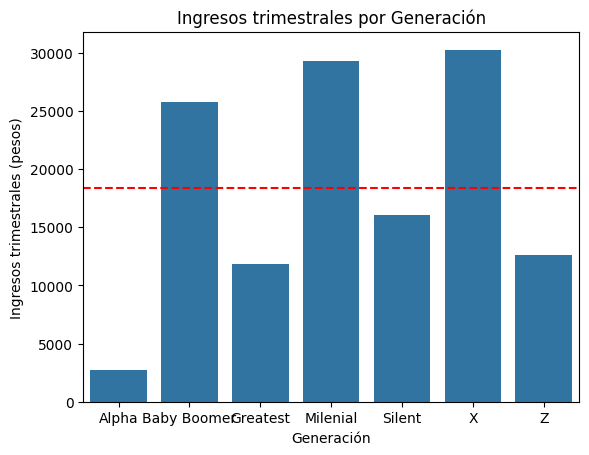

In [34]:
df=df_2022.drop_duplicates(subset=[ 'folioviv','foliohog','numren','sexo','edad','parentesco'], keep='first', inplace=False)

number_of_literate_people=len(df[is_literate(df)])
number_of_illiterate_people=len(df[~is_literate(df)])
total_of_people=len(df)
valor='ing_tri_individual_total'

generacion=df.groupby('generacion',as_index=False)[valor].mean()
sns.barplot(x='generacion', y=valor, data=generacion)
valor_promedio = generacion[valor].mean()
plt.axhline(valor_promedio, color='red', linestyle='--', label='Promedio Global')
# Mostrar el gráfico
plt.title('Ingresos trimestrales por Generación')
plt.xlabel('Generación')
plt.ylabel('Ingresos trimestrales (pesos)')
plt.show()

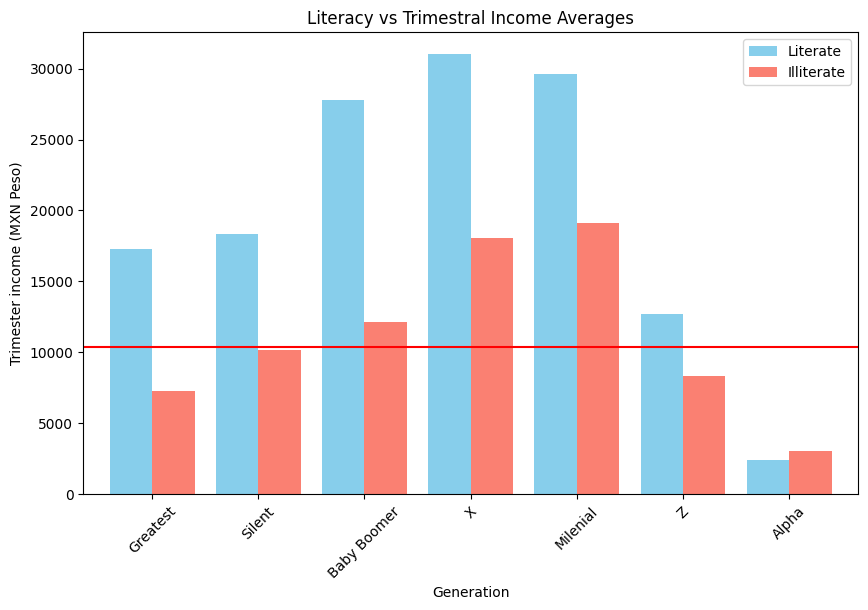

In [51]:
df=df_2022.drop_duplicates(subset=[ 'folioviv','foliohog','numren','sexo','edad','parentesco'], keep='first', inplace=False)

illiterate=df[~is_literate(df)]
literate=df[is_literate(df)]

number_of_literate_people=len(df[is_literate(df)])
number_of_illiterate_people=len(df[~is_literate(df)])
total_of_people=len(df)
valor='ing_tri_individual_total'

generation_literate=literate.groupby('generacion',as_index=True)[valor].mean()
generation_illiterate=illiterate.groupby('generacion',as_index=True)[valor].mean()

valor_promedio = df[valor].mean()
minimum_trimester_salary=172.87 * 60 # daily minimum wage X business days in trimester


generation = pd.DataFrame({
    'Literate':generation_literate,
    'Illiterate': generation_illiterate
})

category_order=['Greatest','Silent','Baby Boomer', 'X', 'Milenial', 'Z','Alpha'] 
generation.index = pd.CategoricalIndex(generation.index, categories=category_order, ordered=True)
generation = generation.sort_index()


# Plot with Pandas
ax = generation.plot(kind='bar', width=0.8, figsize=(10, 6), color=['skyblue', 'salmon'])
#plt.axhline(valor_promedio, color='red', linestyle='--', label='Promedio Global')
plt.axhline(minimum_trimester_salary, color='red', linestyle='solid', label='Promedio Global')

ax.set_ylabel('Trimester income (MXN Peso)')
ax.set_xlabel('Generation')

ax.set_title('Literacy vs Trimestral Income Averages')
plt.xticks(rotation=45)
plt.show()

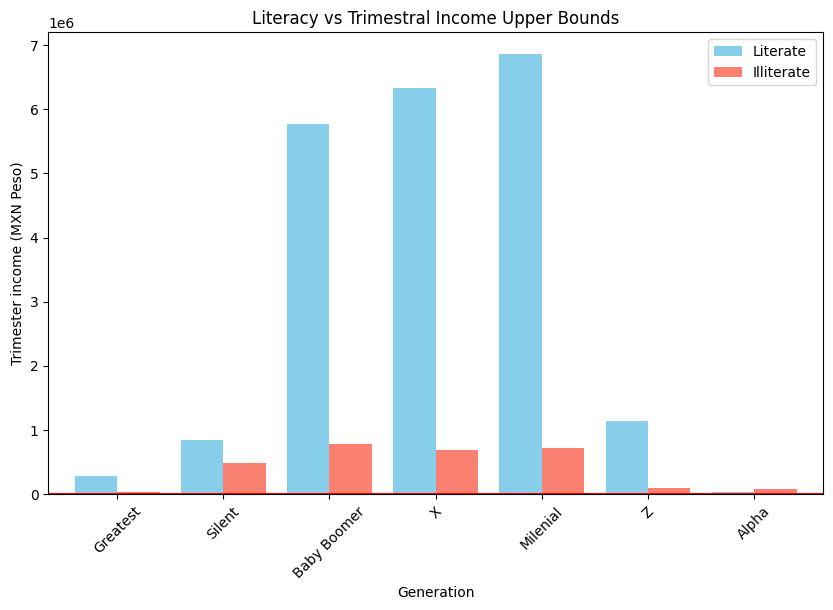

In [52]:
df=df_2022.drop_duplicates(subset=[ 'folioviv','foliohog','numren','sexo','edad','parentesco'], keep='first', inplace=False)

illiterate=df[~is_literate(df)]
literate=df[is_literate(df)]

number_of_literate_people=len(df[is_literate(df)])
number_of_illiterate_people=len(df[~is_literate(df)])
total_of_people=len(df)
valor='ing_tri_individual_total'

generation_literate=literate.groupby('generacion',as_index=True)[valor].max()
generation_illiterate=illiterate.groupby('generacion',as_index=True)[valor].max()

valor_promedio = df[valor].mean()
minimum_trimester_salary=172.87 * 60 # daily minimum wage X business days in trimester


generation = pd.DataFrame({
    'Literate':generation_literate,
    'Illiterate': generation_illiterate
})

category_order=['Greatest','Silent','Baby Boomer', 'X', 'Milenial', 'Z','Alpha'] 
generation.index = pd.CategoricalIndex(generation.index, categories=category_order, ordered=True)
generation = generation.sort_index()



# Plot with Pandas
ax = generation.plot(kind='bar', width=0.8, figsize=(10, 6), color=['skyblue', 'salmon'])
#plt.axhline(valor_promedio, color='red', linestyle='--', label='Promedio Global')
plt.axhline(minimum_trimester_salary, color='red', linestyle='solid', label='Promedio Global')

ax.set_ylabel('Trimester income (MXN Peso)')
ax.set_xlabel('Generation')

ax.set_title('Literacy vs Trimestral Income Upper Bounds')
plt.xticks(rotation=45)
plt.show()